In [1]:
import pandas as pd
from pathlib import Path

In [3]:
dataset_path = '/Volumes/KINGSTON/Datasets/imet-2021-fgvc8'
labels_data = pd.read_csv(dataset_path + '/label_map.csv')
train_data = pd.read_csv(dataset_path + '/train-from-kaggle.csv')

In [4]:
labels_data.head()

,attribute_id,attribute_name
0,0,country::afghanistan
1,1,country::alamania
2,2,country::algeria
3,3,country::arabia
4,4,country::armenia


In [5]:
train_data.columns

Index(['id', 'attribute_ids'], dtype='object')

# Top 20 Features by Frequency in Train Data

In [35]:
attr_counts = pd.read_csv('attr_counts.csv').set_index('Unnamed: 0')
attr_counts.index.name = 'categories'

In [36]:
# Display the top 20 most frequent attribute ids
top20 = attr_counts.head(20)
print(top20)

# Optional: merge with labels_data to see attribute names alongside their frequencies
# Ensure the index types match by converting top20's index to int
top20.index = top20.index.astype(int)
top20_details = labels_data.set_index('attribute_id').loc[top20.index]
top20_details['frequency'] = top20
print(top20_details)

            count
categories       
3170        21784
781         21142
782         20672
785         20657
783         19881
784         19602
3465        15840
2635        11653
2493        11636
448         11077
2299        10589
370         10227
23           9746
2997         9498
2362         8699
149          8630
233          7723
3263         7527
341          7457
1449         7430
                   attribute_name   category sub_category  frequency
categories                                                          
3170                    tags::men       tags          men      21784
781              dimension::large  dimension        large      21142
782             dimension::medium  dimension       medium      20672
785         dimension::very large  dimension   very large      20657
783              dimension::small  dimension        small      19881
784               dimension::tiny  dimension         tiny      19602
3465                  tags::women       tags        

In [37]:
import matplotlib.pyplot as plt

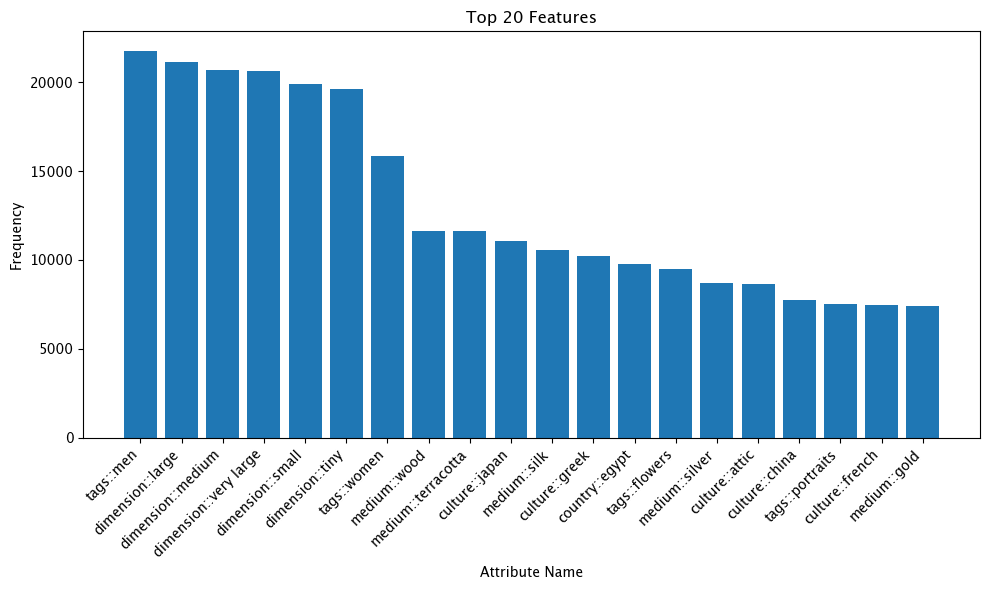

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(top20_details['attribute_name'], top20_details['frequency'])
plt.title('Top 20 Features')
plt.xlabel('Attribute Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
percentage_top20 = (top20.sum() / attr_counts.sum()) * 100
print(f"{percentage_top20:.2f}%")

41.63%


# Categories Frequency

### All Great Categories: Country, Culture, Dimension, Medium, Tags

In [16]:
labels_data['category'] = labels_data['attribute_name'].str.split('::').str[0]
labels_data['sub_category'] = labels_data['attribute_name'].str.split('::').str[1]

In [17]:
labels_data['category'].unique()

array(['country', 'culture', 'dimension', 'medium', 'tags'], dtype=object)

In [20]:
print(labels_data.shape)
labels_data['sub_category'].nunique()

(3474, 4)


3439

In [21]:
# Identify and print duplicate sub_category values in labels_data
sub_category_counts = labels_data['sub_category'].value_counts()
duplicate_sub_categories = sub_category_counts[sub_category_counts > 1]
print(duplicate_sub_categories)

sub_category
greek                   2
korea                   2
iran                    2
ecuador                 2
egypt                   2
amber                   2
indonesia               2
medium                  2
shells                  2
france                  2
mexico                  2
india                   2
french                  2
bamboo                  2
gaul                    2
new zealand             2
mali                    2
united states           2
beads                   2
switzerland             2
costa rica or panama    2
spain                   2
hair                    2
japan                   2
imari type              2
peru                    2
costa rica              2
persian                 2
canada                  2
coptic                  2
mercury                 2
china                   2
colombia                2
feathers                2
guatemala               2
Name: count, dtype: int64


In [23]:
# Group by 'category' and aggregate the 'attribute_id's into a list for each category
category_attribute_ids = labels_data.groupby('category')['attribute_id'].apply(list).to_dict()

# Display the resulting dictionary
category_attribute_ids

{'country': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'culture': [100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  

In [41]:
# Compute the sum of counts of all attribute IDs in each category
category_counts = {}
for category, attribute_ids in category_attribute_ids.items():
    # Filter attribute IDs to include only those present in attr_counts
    valid_attribute_ids = [attr_id for attr_id in attribute_ids if attr_id in attr_counts.index]
    # Sum their counts
    category_counts[category] = attr_counts.loc[valid_attribute_ids].sum().values[0]

# Display the resulting dictionary
print(category_counts)

{'country': np.int64(25528), 'culture': np.int64(101246), 'dimension': np.int64(101954), 'medium': np.int64(195854), 'tags': np.int64(203521)}


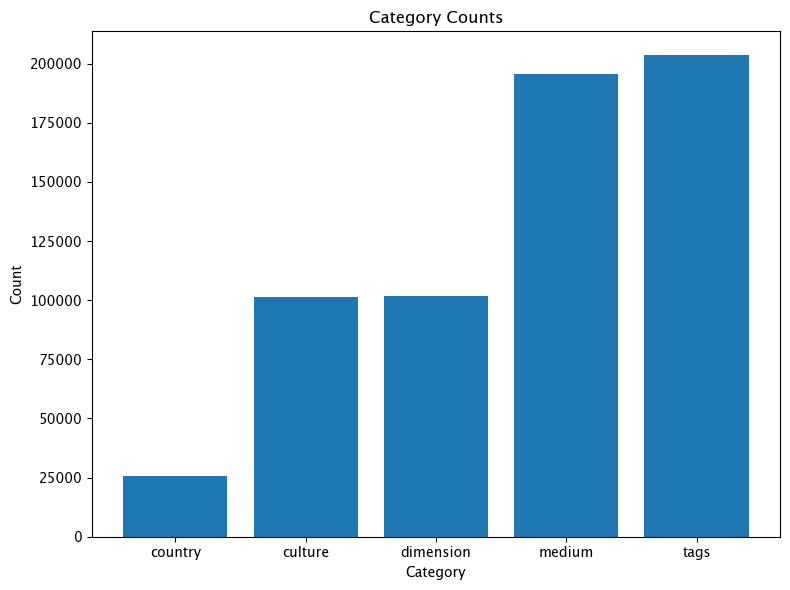

In [42]:
plt.figure(figsize=(8, 6))
plt.bar(list(category_counts.keys()), list(category_counts.values()))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Counts")
plt.tight_layout()
plt.show()

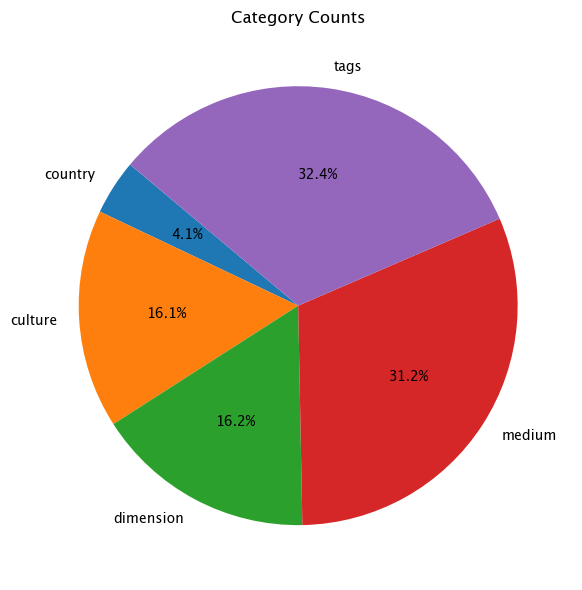

In [81]:
plt.figure(figsize=(8, 6))
plt.pie(list(category_counts.values()), labels=list(category_counts.keys()), autopct='%1.1f%%', startangle=140)
plt.title("Category Counts")
plt.tight_layout()
plt.show()

# Tags' Subcategories Frequency Counts

In [45]:
labels_data[['category', 'sub_category', 'attribute_id']].head()

,category,sub_category,attribute_id
0,country,afghanistan,0
1,country,alamania,1
2,country,algeria,2
3,country,arabia,3
4,country,armenia,4


In [44]:
unique_tags_sub_categories = labels_data.loc[labels_data['category'] == 'tags', 'sub_category'].unique()
print(unique_tags_sub_categories)

['abbeys' 'abraham' 'abstraction' 'acanthus' 'achilles' 'acorns'
 'acrobats' 'actors' 'actresses' 'adam' 'admirals' 'adonis'
 'adoration of the magi' 'adoration of the shepherds' 'ajax'
 'alexander the great' 'allegory' 'altars' 'amazons' 'american civil war'
 'american revolution' 'amphitheatres' 'amulets' 'amun' 'angels' 'anger'
 'animals' 'ankh' 'anklet' 'annunciation' 'aphrodite' 'apocalypse'
 'apollo' 'apostles' 'apples' 'arabic' 'archangel gabriel' 'arches'
 'architects' 'architecture' 'ariadne' 'armor' 'arms' 'army' 'arrowheads'
 'arrows' 'artemis' 'artists' 'assumption of the virgin' 'astronomy'
 'athena' 'athletes' 'autumn' 'avalokiteshvara' 'axes' 'bacchus' 'badges'
 'bagpipes' 'balconies' 'ballet' 'bamboo' 'banners' 'baptism of christ'
 'baptismal fonts' 'barns' 'barrels' 'baseball' 'basins' 'baskets'
 'bathing' 'bathsheba' 'bats' 'battles' 'beaches' 'beads' 'beakers'
 'bearing the cross' 'bears' 'bedrooms' 'beds' 'bees' 'benches'
 'benjamin franklin' 'bes' 'bible' 'bicycles

In [49]:
tags_unique_ids = labels_data.loc[
    (labels_data['category'] == 'tags') & (labels_data['sub_category'].isin(unique_tags_sub_categories)),
    'attribute_id'
].tolist()
print(tags_unique_ids)
print(type(tags_unique_ids))

[2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 287

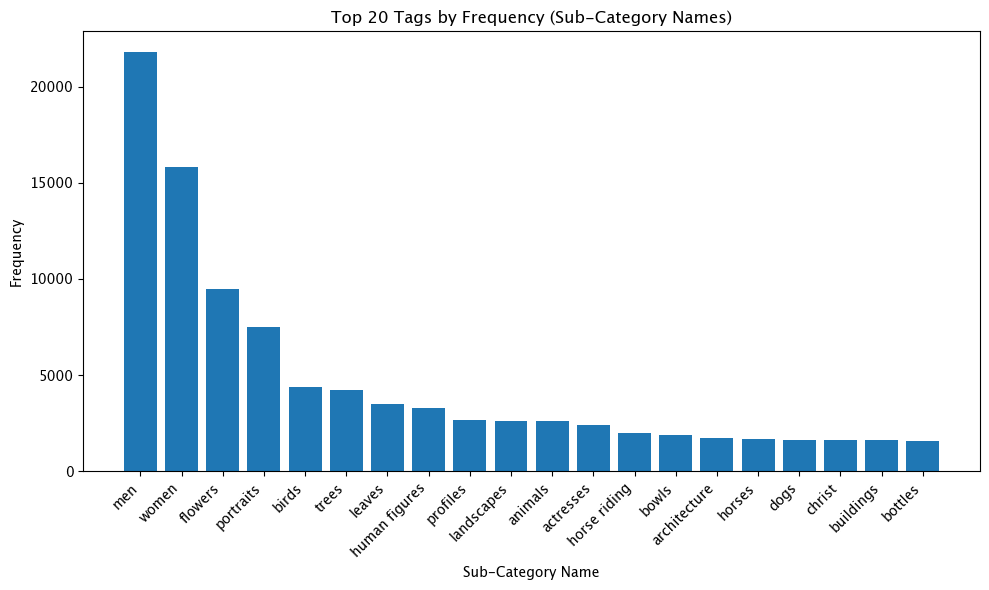

In [54]:
# Filter attribute IDs to include only those present in attr_counts
tags_unique_ids = [attr_id for attr_id in tags_unique_ids if attr_id in attr_counts.index]

# Get counts for each ID in tags_unique_ids
tags_counts = attr_counts.loc[tags_unique_ids]

# Merge with labels_data to get sub_category names
tags_counts = tags_counts.merge(labels_data[['attribute_id', 'sub_category']], left_index=True, right_on='attribute_id')

# Get the top 20 sub_categories by count
top20_tags_counts = tags_counts.nlargest(20, 'count')

# Plot the top 20 sub_categories
plt.figure(figsize=(10, 6))
plt.bar(top20_tags_counts['sub_category'], top20_tags_counts['count'])
plt.title('Top 20 Tags by Frequency (Sub-Category Names)')
plt.xlabel('Sub-Category Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
percentage_top20_tags = (top20_tags_counts['count'].sum() / tags_counts['count'].sum()) * 100
print(f'{percentage_top20_tags:.2f}%')

46.25%


# The Rest of Categories' Subcategories Freq Graphs

In [63]:
unique_country_sub_categories = labels_data.loc[labels_data['category'] == 'country', 'sub_category'].unique()
unique_culture_sub_categories = labels_data.loc[labels_data['category'] == 'culture', 'sub_category'].unique()
unique_dimension_sub_categories = labels_data.loc[labels_data['category'] == 'dimension', 'sub_category'].unique()
unique_medium_sub_categories = labels_data.loc[labels_data['category'] == 'medium', 'sub_category'].unique()

print(f"Category 'Country' has {len(unique_country_sub_categories)} unique subcategories")
print(f"Category 'Culture' has {len(unique_culture_sub_categories)} unique subcategories")
print(f"Category 'Dimension' has {len(unique_dimension_sub_categories)} unique subcategories")
print(f"Category 'Medium' has {len(unique_medium_sub_categories)} unique subcategories")

Category 'Country' has 100 unique subcategories
Category 'Culture' has 681 unique subcategories
Category 'Dimension' has 5 unique subcategories
Category 'Medium' has 1920 unique subcategories


In [68]:
country_unique_ids = labels_data.loc[
    (labels_data['category'] == 'country') & (labels_data['sub_category'].isin(unique_country_sub_categories)),
    'attribute_id'
].tolist()

culture_unique_ids = labels_data.loc[
    (labels_data['category'] == 'culture') & (labels_data['sub_category'].isin(unique_culture_sub_categories)),
    'attribute_id'
].tolist()

dimension_unique_ids = labels_data.loc[
    (labels_data['category'] == 'dimension') & (labels_data['sub_category'].isin(unique_dimension_sub_categories)),
    'attribute_id'
].tolist()

medium_unique_ids = labels_data.loc[
    (labels_data['category'] == 'medium') & (labels_data['sub_category'].isin(unique_medium_sub_categories)),
    'attribute_id'
].tolist()

In [69]:
print(f"Category 'Country' has {len(country_unique_ids)} unique subcategories")
print(f"Category 'Culture' has {len(culture_unique_ids)} unique subcategories")
print(f"Category 'Dimension' has {len(dimension_unique_ids)} unique subcategories")
print(f"Category 'Medium' has {len(medium_unique_ids)} unique subcategories")

Category 'Country' has 100 unique subcategories
Category 'Culture' has 681 unique subcategories
Category 'Dimension' has 5 unique subcategories
Category 'Medium' has 1920 unique subcategories


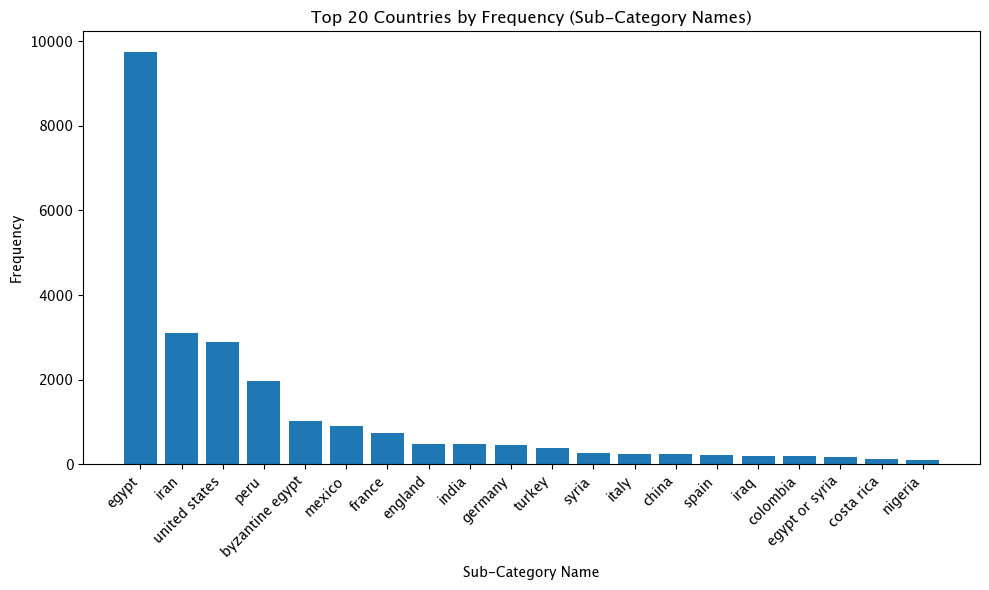

In [70]:
country_counts = attr_counts.loc[country_unique_ids]
country_counts = country_counts.merge(labels_data[['attribute_id', 'sub_category']], left_index=True, right_on='attribute_id')
top20_country_counts = country_counts.nlargest(20, 'count')

# Plot the top 20 sub_categories
plt.figure(figsize=(10, 6))
plt.bar(top20_country_counts['sub_category'], top20_country_counts['count'])
plt.title('Top 20 Countries by Frequency (Sub-Category Names)')
plt.xlabel('Sub-Category Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

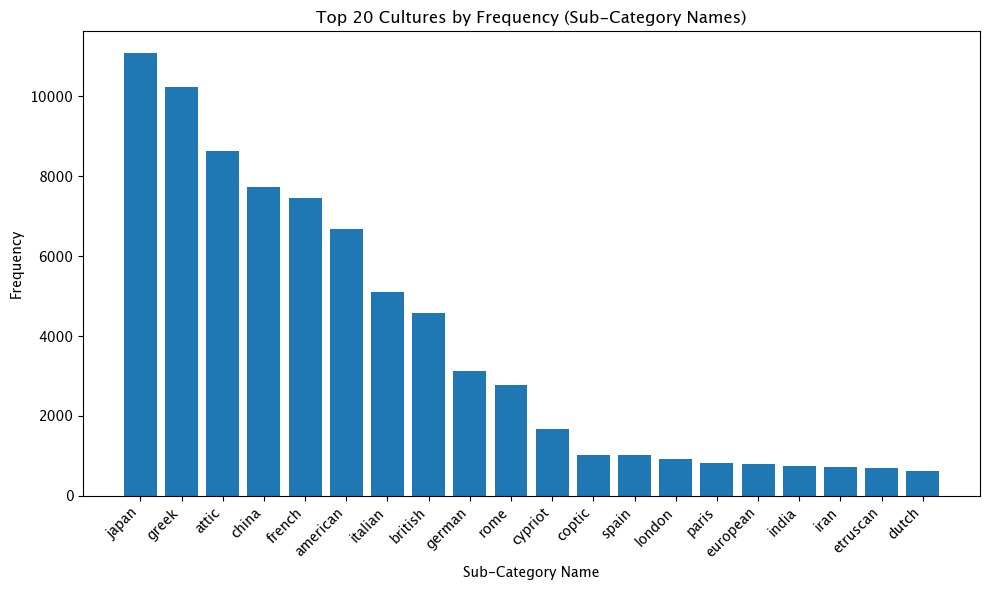

In [72]:
culture_unique_ids = [attr_id for attr_id in culture_unique_ids if attr_id in attr_counts.index]
culture_counts = attr_counts.loc[culture_unique_ids]
culture_counts = culture_counts.merge(labels_data[['attribute_id', 'sub_category']], left_index=True, right_on='attribute_id')
top20_culture_counts = culture_counts.nlargest(20, 'count')

# Plot the top 20 sub_categories
plt.figure(figsize=(10, 6))
plt.bar(top20_culture_counts['sub_category'], top20_culture_counts['count'])
plt.title('Top 20 Cultures by Frequency (Sub-Category Names)')
plt.xlabel('Sub-Category Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

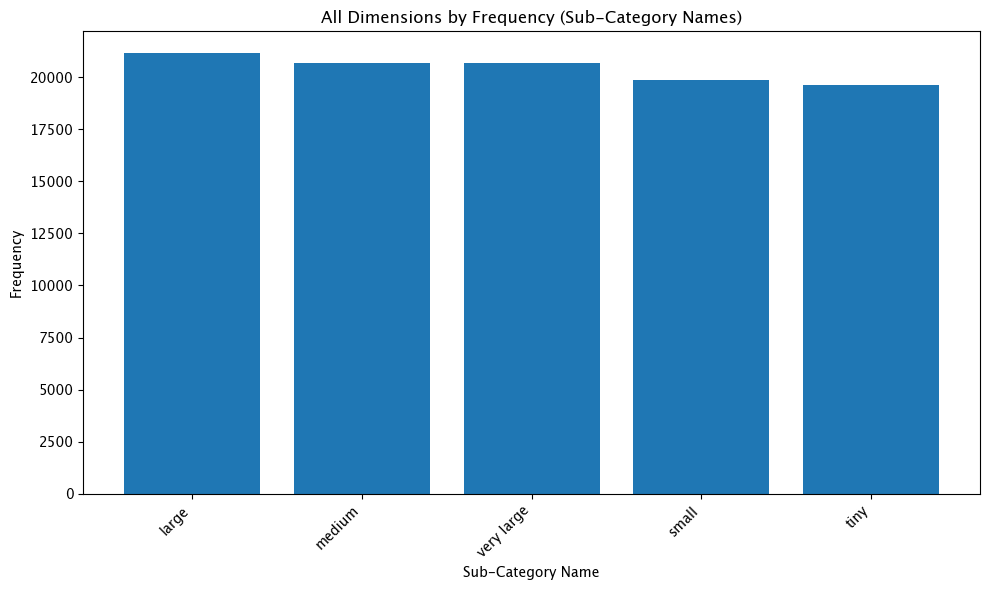

In [76]:
dimension_unique_ids = [attr_id for attr_id in dimension_unique_ids if attr_id in attr_counts.index]
dimension_counts = attr_counts.loc[dimension_unique_ids]
dimension_counts = dimension_counts.merge(labels_data[['attribute_id', 'sub_category']], left_index=True, right_on='attribute_id')
all_dimension_counts = dimension_counts.nlargest(dimension_counts.shape[0], 'count')

# Plot all 5 sub-categories
plt.figure(figsize=(10, 6))
plt.bar(all_dimension_counts['sub_category'], all_dimension_counts['count'])
plt.title('All Dimensions by Frequency (Sub-Category Names)')
plt.xlabel('Sub-Category Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

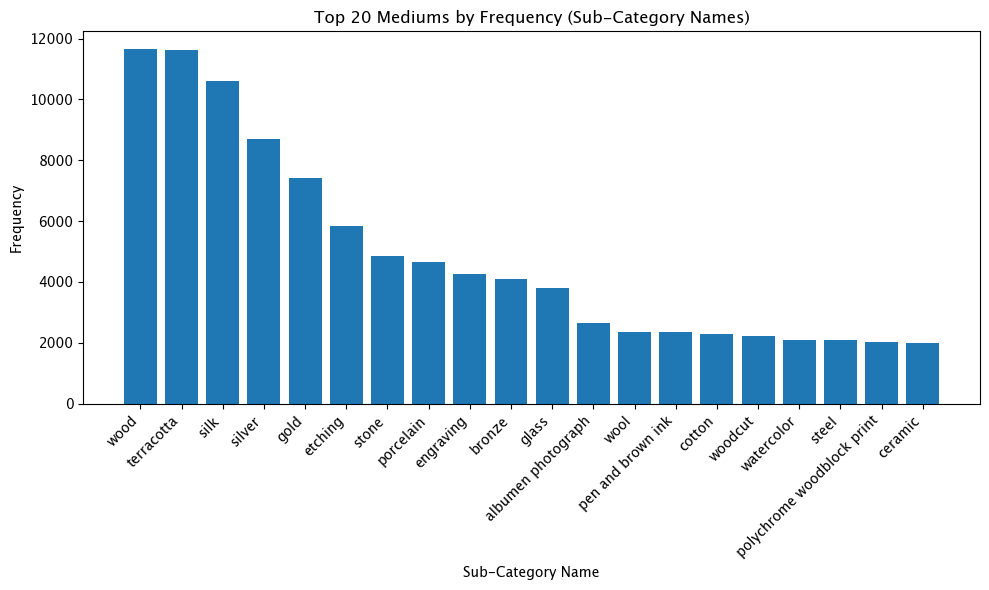

In [77]:
medium_unique_ids = [attr_id for attr_id in medium_unique_ids if attr_id in attr_counts.index]
medium_counts = attr_counts.loc[medium_unique_ids]
medium_counts = medium_counts.merge(labels_data[['attribute_id', 'sub_category']], left_index=True, right_on='attribute_id')
top20_medium_counts = medium_counts.nlargest(20, 'count')

# Plot top 20 Medium sub-categories
plt.figure(figsize=(10, 6))
plt.bar(top20_medium_counts['sub_category'], top20_medium_counts['count'])
plt.title('Top 20 Mediums by Frequency (Sub-Category Names)')
plt.xlabel('Sub-Category Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [78]:
percentage_top20_country = (top20_country_counts['count'].sum() / country_counts['count'].sum()) * 100
percentage_top20_culture = (top20_culture_counts['count'].sum() / culture_counts['count'].sum()) * 100
percentage_top20_medium = (top20_medium_counts['count'].sum() / medium_counts['count'].sum()) * 100

print(f'Top 20 Country Sub-categories Percentage: {percentage_top20_country:.2f}%')
print(f'Top 20 Culture Sub-categories Percentage: {percentage_top20_culture:.2f}%')
print(f'Top 20 Medium Sub-categories Percentage: {percentage_top20_medium:.2f}%')

Top 20 Country Sub-categories Percentage: 94.02%
Top 20 Culture Sub-categories Percentage: 75.46%
Top 20 Medium Sub-categories Percentage: 49.84%


In [84]:
percentage_top20_country = f"{percentage_top20_country:.2f}%"
percentage_top20_culture = f"{percentage_top20_culture:.2f}%"
percentage_top20_medium = f"{percentage_top20_medium:.2f}%"
percentage_top20_tags = f"{percentage_top20_tags:.2f}%"

print(percentage_top20_country)
print(percentage_top20_culture)
print(percentage_top20_medium)
print(percentage_top20_tags)

94.02%
75.46%
49.84%
46.25%


# Save a top20_subcategories_percentage_data CSV

In [ ]:
top20_percentages = [
    percentage_top20_country,
    percentage_top20_culture,
    '100%',  # For the 'dimension' category (all subcategories are used)
    percentage_top20_medium,
    percentage_top20_tags
]

num_subcategories = [
    len(unique_country_sub_categories),
    len(unique_culture_sub_categories),
    len(unique_dimension_sub_categories),
    len(unique_medium_sub_categories),
    len(unique_tags_sub_categories)
]

categories_names = [
    'country',
    'culture',
    'dimension',
    'medium',
    'tags'
]

top20_subcategories_percentage_data = pd.DataFrame({
    'Top 20 Subcategories %': top20_percentages,
    '# of Subcategories': num_subcategories
})

top20_subcategories_percentage_data.index = categories_names  # type: ignore
top20_subcategories_percentage_data.to_csv('top20_subcategories_percentage_data.csv')

In [96]:
top20_subcategories_percentage_data = pd.read_csv('top20_subcategories_percentage_data.csv').set_index('Unnamed: 0')
top20_subcategories_percentage_data.index.name = 'Categories'
top20_subcategories_percentage_data.head()

,Top 20 Subcategories %,# of Subcategories
Categories,,
country,94.02%,100
culture,75.46%,681
dimension,100%,5
medium,49.84%,1920
tags,46.25%,768
